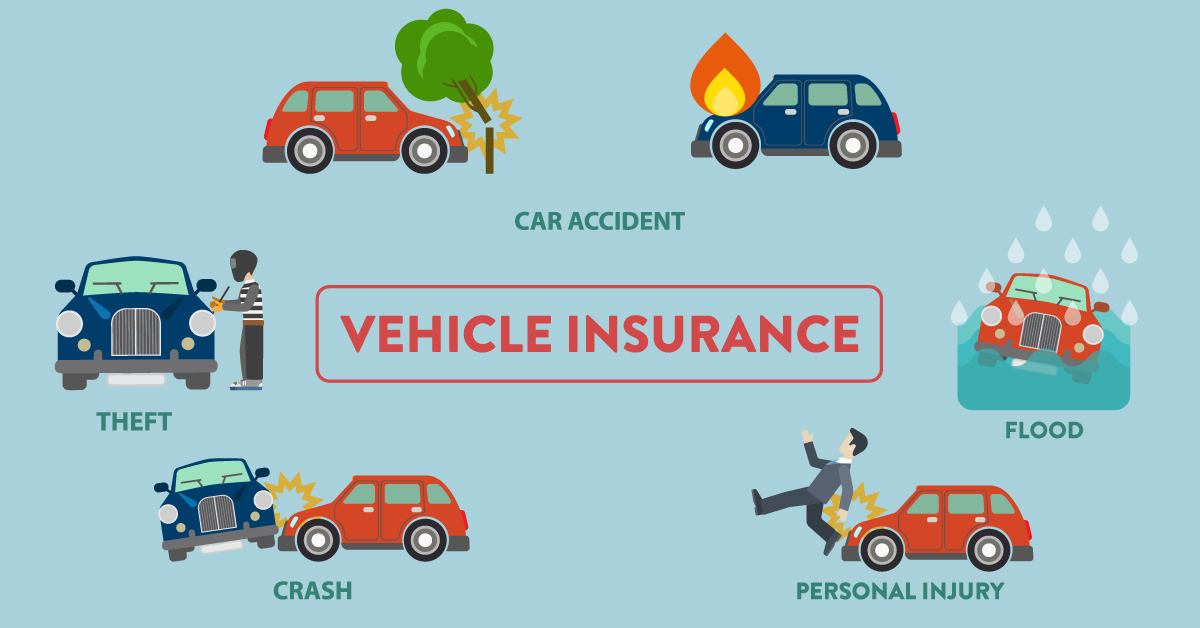

<font size="+3" color='#053c96'><b> Problem Statement</b></font>

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

<font size="+3" color='#053c96'><b>Bussiness Goal</b></font>

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

<font size="+3" color='#053c96'><b>This Notebook will cover - </b></font>
### 1. Exploratory Data Analysis
### 2. Data Modelling and Evaluation

# Import Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
sns.set(style='whitegrid')

# Import Dataset

In [58]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [59]:
train_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [60]:
test_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [61]:
print(f"Shape of Train data{train_df.shape}")
print(f"Shape of Test data{test_df.shape}")

Shape of Train data(381109, 12)
Shape of Test data(127037, 11)


# Check for missing values

In [62]:
train_df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

* No missing data

<font size="+3" color='#540b11'><b> Exploratory Data Analysis </b></font>

In [63]:
numerical_columns=['Age', 'Region_Code','Annual_Premium','Vintage']
categorical_columns=['Gender','Driving_License','Previously_Insured','Vehicle_Age','Vehicle_Damage','Response']

In [64]:
train_df[numerical_columns].describe()

,Age,Region_Code,Annual_Premium,Vintage
count,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,26.388807,30564.389581,154.347397
std,15.511611,13.229888,17213.155057,83.671304
min,20.000000,0.000000,2630.000000,10.000000
25%,25.000000,15.000000,24405.000000,82.000000
50%,36.000000,28.000000,31669.000000,154.000000
75%,49.000000,35.000000,39400.000000,227.000000
max,85.000000,52.000000,540165.000000,299.000000


In [65]:
train_df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


# Target Variable (Response)

<Axes: ylabel='count'>

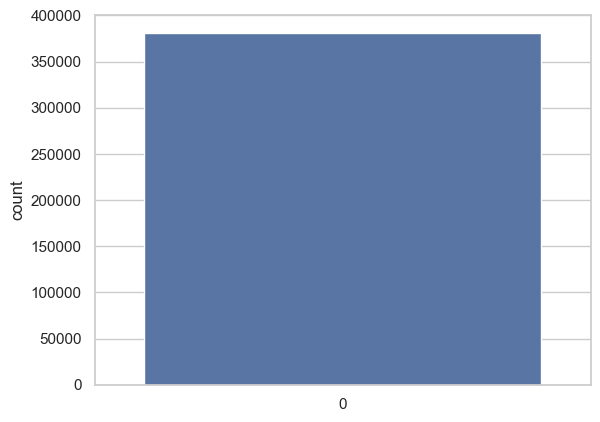

In [66]:
sns.countplot(train_df.Response)

In [68]:
train_df["Response"].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

# Age Distribution of Customers

c:\Users\Admin\anaconda3\envs\cross_sell_prediction\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


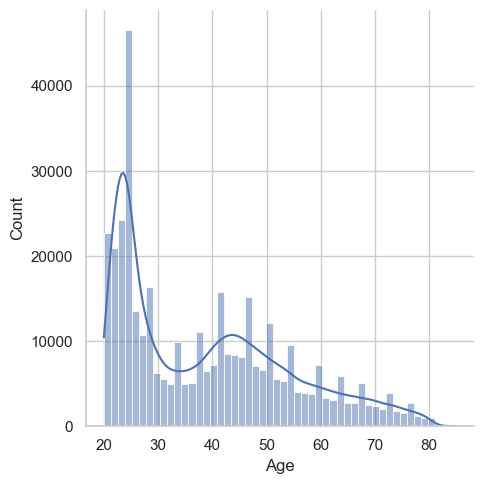

In [69]:
# using bins= 50 parameter in new displot() is equivalent to distplot graph (which is deprecated now)
sns.displot(train_df.Age, kde = True, bins = 50)

<Axes: ylabel='Age'>

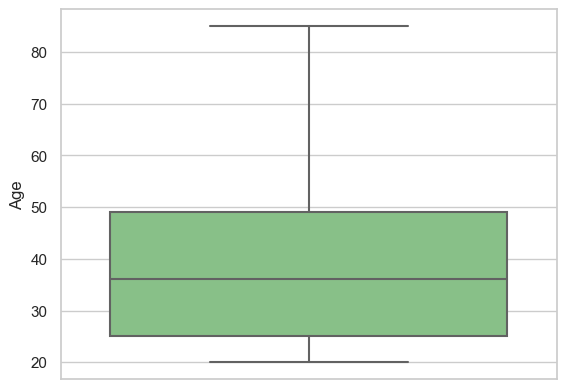

In [70]:
sns.boxplot(y = 'Age', data = train_df, palette = 'Accent')

# Age Vs Annual premium 

<Axes: xlabel='Age', ylabel='Annual_Premium'>

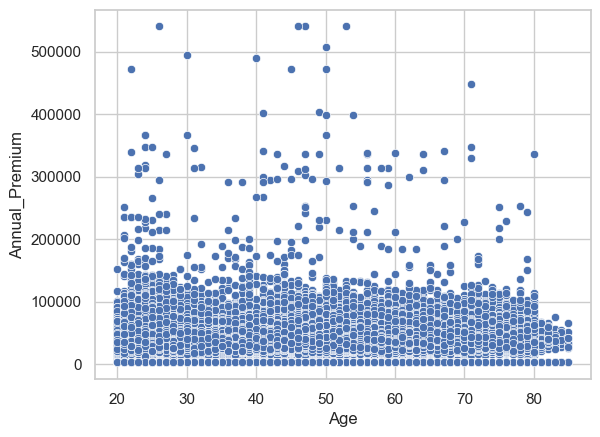

In [71]:
sns.scatterplot(x = train_df['Age'], y = train_df['Annual_Premium'])

# Gender and Response

In [79]:
train_df.dtypes

id                         int64
Gender                  category
Age                        int64
Driving_License            int64
Region_Code              float64
Previously_Insured         int64
Vehicle_Age               object
Vehicle_Damage            object
Annual_Premium           float64
Policy_Sales_Channel     float64
Vintage                    int64
Response                   int64
dtype: object

In [77]:
train_df["Gender"] = train_df["Gender"].astype('category')

<Axes: xlabel='Gender', ylabel='count'>

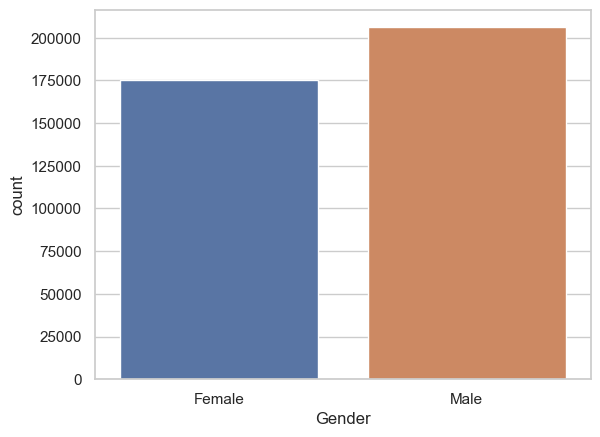

In [86]:
sns.countplot(x = train_df.Gender)

#### Test code

In [49]:
d1 = train_df.groupby(['Gender','Response'])['id'].count()

In [50]:
d1

Gender  Response
Female  0           156835
        1            18185
Male    0           177564
        1            28525
Name: id, dtype: int64

In [51]:
d1 = d1.to_frame()
d1

id
Gender Response        
Female 0         156835
       1          18185
Male   0         177564
       1          28525

In [53]:
d1 = d1.rename(columns={'id':'count'})
d1

count
Gender Response        
Female 0         156835
       1          18185
Male   0         177564
       1          28525

In [54]:
d1 = d1.reset_index()
d1

,Gender,Response,count
0,Female,0,156835
1,Female,1,18185
2,Male,0,177564
3,Male,1,28525


Group gender and response and convert it back to df

In [16]:
df = train_df.groupby(['Gender','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()


c:\Users\Admin\anaconda3\envs\cross_sell_prediction\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


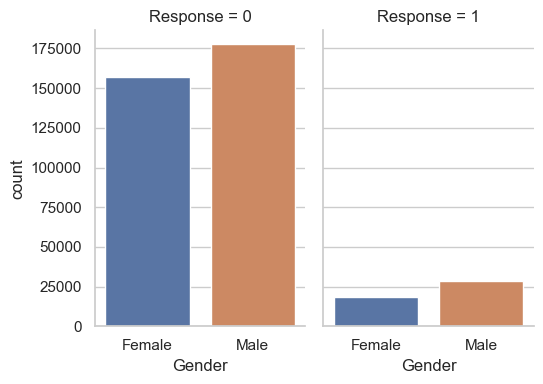

In [17]:
g = sns.catplot(x="Gender", y="count",col="Response",
                data=df, kind="bar",
                height=4, aspect=.7);

# Driving license by Gender

In [87]:
df=train_df.groupby(['Gender'])['Driving_License'].count().to_frame().reset_index()

In [88]:
df

,Gender,Driving_License
0,Female,175020
1,Male,206089


c:\Users\Admin\anaconda3\envs\cross_sell_prediction\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


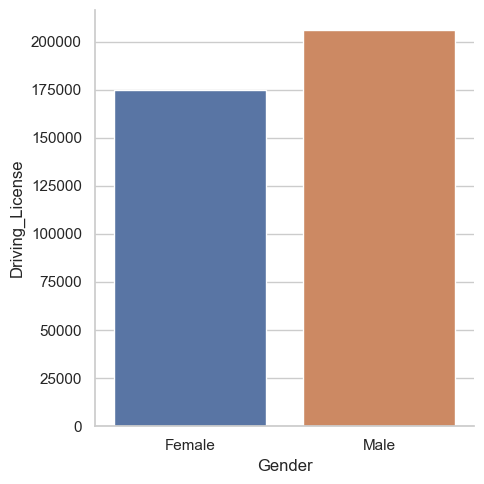

In [89]:
sns.catplot(x="Gender", y="Driving_License",
                data=df, kind="bar");

# Customers having Vehicle insurance already

<Axes: xlabel='Previously_Insured', ylabel='count'>

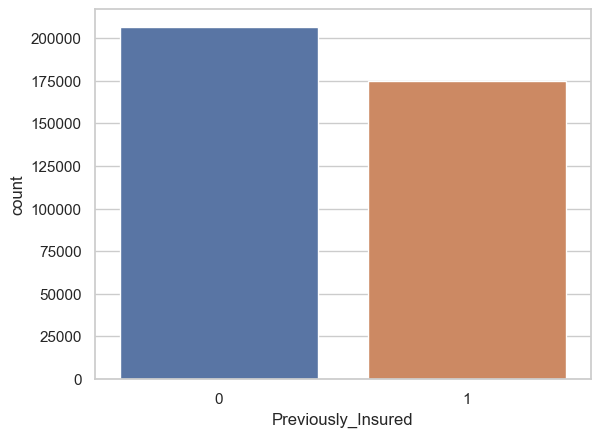

In [91]:
sns.countplot(x = train_df.Previously_Insured)

# Vehicle Age 

<Axes: xlabel='Vehicle_Age', ylabel='count'>

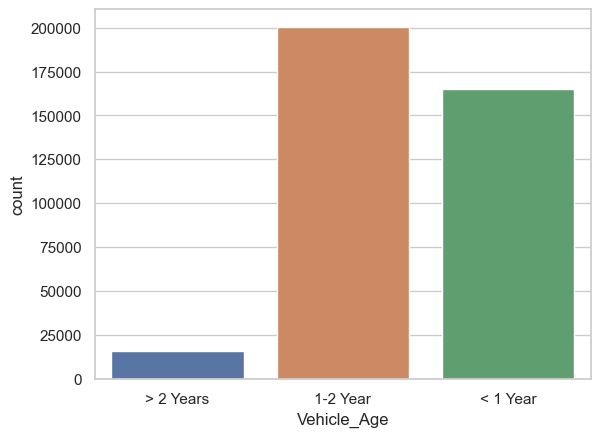

In [92]:
sns.countplot(x = train_df.Vehicle_Age)

# Response and Vehicle age

In [93]:
df=train_df.groupby(['Vehicle_Age','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
df

,Vehicle_Age,Response,count
0,1-2 Year,0,165510
1,1-2 Year,1,34806
2,< 1 Year,0,157584
3,< 1 Year,1,7202
4,> 2 Years,0,11305
5,> 2 Years,1,4702


c:\Users\Admin\anaconda3\envs\cross_sell_prediction\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


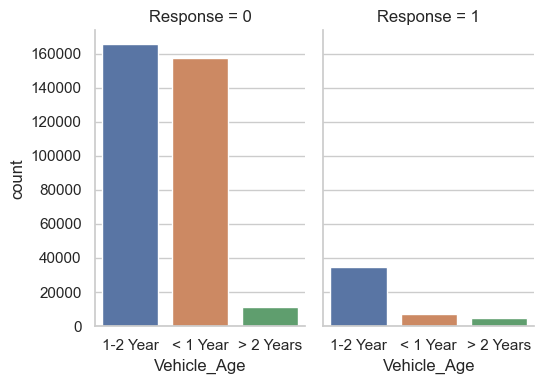

In [94]:
g = sns.catplot(x="Vehicle_Age", y="count",col="Response",
                data=df, kind="bar",
                height=4, aspect=.7);

# Customers having damaged vehicle

<Axes: xlabel='Vehicle_Damage', ylabel='count'>

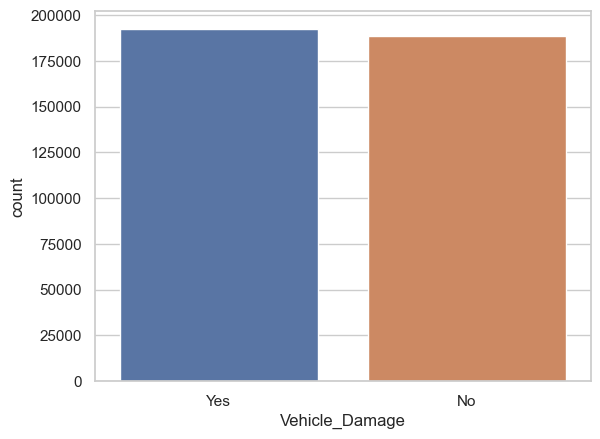

In [95]:
sns.countplot(x = train_df.Vehicle_Damage)

# Damage Vehicle and Response

In [96]:
df=train_df.groupby(['Vehicle_Damage','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()

c:\Users\Admin\anaconda3\envs\cross_sell_prediction\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


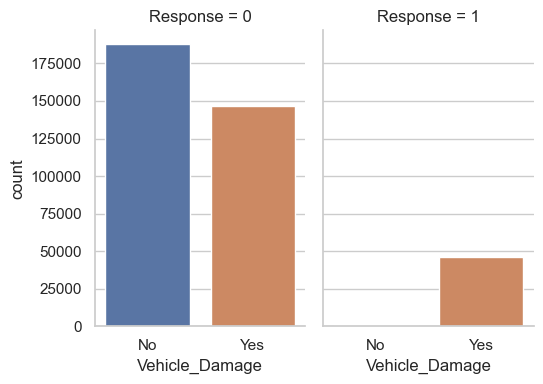

In [97]:
g = sns.catplot(x="Vehicle_Damage", y="count",col="Response",
                data=df, kind="bar",
                height=4, aspect=.7);

# Annual Premium Distribution 

c:\Users\Admin\anaconda3\envs\cross_sell_prediction\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


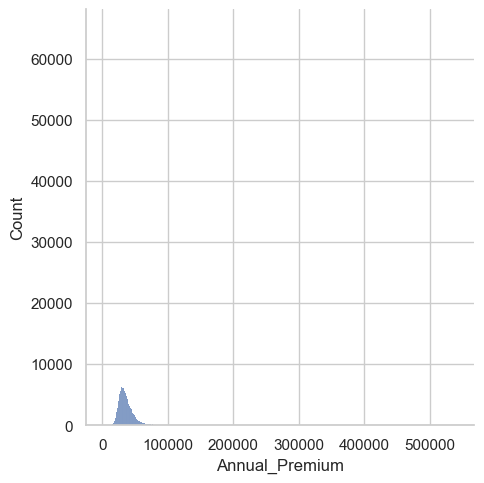

In [101]:
sns.displot(train_df.Annual_Premium)

<Axes: ylabel='Annual_Premium'>

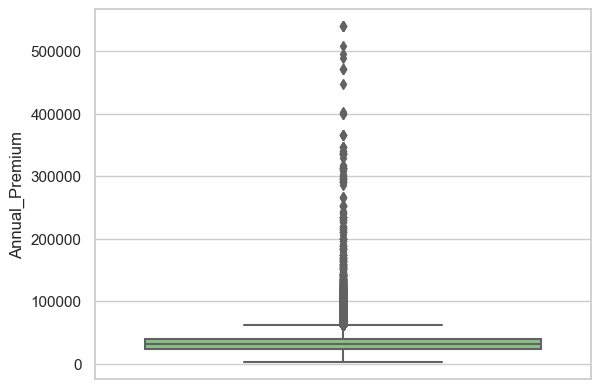

In [102]:
sns.boxplot(y = 'Annual_Premium', data = train_df,palette='Accent')

# Vintage

Number of Days, Customer has been associated with the company

C:\Users\Admin\AppData\Local\Temp\ipykernel_2932\3802506378.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.Vintage)


<Axes: xlabel='Vintage', ylabel='Density'>

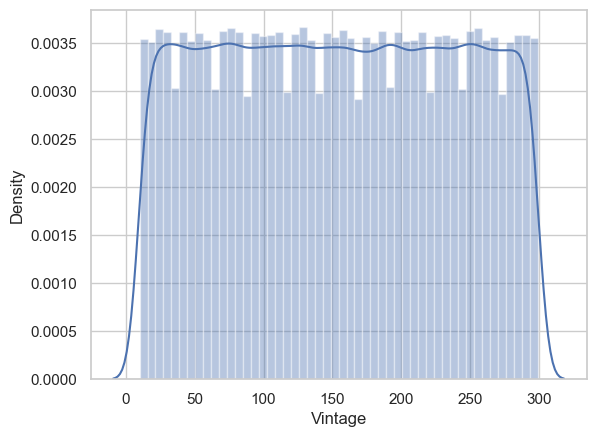

In [103]:
sns.distplot(train_df.Vintage)

<font size="+3" color='#540b11'><b> Data Preprocessing </b> </font>

In [104]:
num_feat = ['Age','Vintage']
cat_feat = ['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age_lt_1_Year','Vehicle_Age_gt_2_Years','Vehicle_Damage_Yes','Region_Code','Policy_Sales_Channel']

In [105]:
train_df['Gender'] = train_df['Gender'].map( {'Female': 0, 'Male': 1} ).astype(int)

In [106]:
train_df=pd.get_dummies(train_df,drop_first=True)

In [108]:
train_df=train_df.rename(columns={"Vehicle_Age_< 1 Year": "Vehicle_Age_lt_1_Year", "Vehicle_Age_> 2 Years": "Vehicle_Age_gt_2_Years"})
train_df['Vehicle_Age_lt_1_Year']=train_df['Vehicle_Age_lt_1_Year'].astype('int')
train_df['Vehicle_Age_gt_2_Years']=train_df['Vehicle_Age_gt_2_Years'].astype('int')
train_df['Vehicle_Damage_Yes']=train_df['Vehicle_Damage_Yes'].astype('int')

In [109]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
ss = StandardScaler()
train_df[num_feat] = ss.fit_transform(train_df[num_feat])


mm = MinMaxScaler()
train_df[['Annual_Premium']] = mm.fit_transform(train_df[['Annual_Premium']])

In [110]:
train_df = train_df.drop('id',axis=1)

In [111]:
for column in cat_feat:
    train_df[column] = train_df[column].astype('str')

In [116]:
train_df.dtypes

Gender                     object
Age                       float64
Driving_License            object
Region_Code                object
Previously_Insured         object
Annual_Premium            float64
Policy_Sales_Channel       object
Vintage                   float64
Response                    int64
Vehicle_Age_lt_1_Year      object
Vehicle_Age_gt_2_Years     object
Vehicle_Damage_Yes         object
dtype: object

In [112]:
train_df

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_lt_1_Year,Vehicle_Age_gt_2_Years,Vehicle_Damage_Yes
0,1,0.333777,1,28.0,0,0.070366,26.0,0.748795,1,0,1,1
1,1,2.396751,1,3.0,0,0.057496,26.0,0.342443,0,0,0,0
2,1,0.527181,1,28.0,0,0.066347,26.0,-1.521998,1,0,1,1
3,1,-1.148985,1,11.0,1,0.048348,152.0,0.581474,0,1,0,0
4,0,-0.633242,1,41.0,1,0.046259,152.0,-1.378580,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,1,2.267815,1,26.0,1,0.051234,26.0,-0.792954,0,0,0,0
381105,1,-0.568774,1,37.0,1,0.069551,152.0,-0.279037,0,1,0,0
381106,1,-1.148985,1,30.0,1,0.060439,160.0,0.079509,0,1,0,0
381107,0,1.881007,1,14.0,0,0.078110,124.0,-0.960275,0,0,1,1


In [113]:
test_df['Gender'] = test_df['Gender'].map( {'Female': 0, 'Male': 1} ).astype(int)
test_df=pd.get_dummies(test_df,drop_first=True)
test_df=test_df.rename(columns={"Vehicle_Age_< 1 Year": "Vehicle_Age_lt_1_Year", "Vehicle_Age_> 2 Years": "Vehicle_Age_gt_2_Years"})
test_df['Vehicle_Age_lt_1_Year']=test_df['Vehicle_Age_lt_1_Year'].astype('int')
test_df['Vehicle_Age_gt_2_Years']=test_df['Vehicle_Age_gt_2_Years'].astype('int')
test_df['Vehicle_Damage_Yes']=test_df['Vehicle_Damage_Yes'].astype('int')

In [114]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
ss = StandardScaler()
test_df[num_feat] = ss.fit_transform(test_df[num_feat])


mm = MinMaxScaler()
test_df[['Annual_Premium']] = mm.fit_transform(test_df[['Annual_Premium']])

In [115]:
for column in cat_feat:
    test_df[column] = test_df[column].astype('str')

In [118]:
from sklearn.model_selection import train_test_split

train_target = train_df['Response']
train_df = train_df.drop(['Response'], axis = 1)
x_train,x_test,y_train,y_test = train_test_split(train_df, train_target, random_state = 0)

In [119]:
id=test_df.id

In [120]:
test=test_df.drop('id',axis = 1)

In [121]:
x_train.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage',
       'Vehicle_Age_lt_1_Year', 'Vehicle_Age_gt_2_Years',
       'Vehicle_Damage_Yes'],
      dtype='object')

<font size="+3" color='#540b11'><b> Data Modelling and Evaluation </b> </font>

In [122]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from scipy.stats import randint
import pickle
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import accuracy_score
# import packages for hyperparameters tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, KFold, GridSearchCV
from sklearn.metrics import f1_score, roc_auc_score,accuracy_score,confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, classification_report 

# Random Forest Classifier

In [123]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


c:\Users\Admin\anaconda3\envs\cross_sell_prediction\lib\site-packages\IPython\core\magics\pylab.py:162: UserWarning: pylab import has clobbered these variables: ['fmin', 'randint']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [124]:
x_train.dtypes

Gender                     object
Age                       float64
Driving_License            object
Region_Code                object
Previously_Insured         object
Annual_Premium            float64
Policy_Sales_Channel       object
Vintage                   float64
Vehicle_Age_lt_1_Year      object
Vehicle_Age_gt_2_Years     object
Vehicle_Damage_Yes         object
dtype: object

In [125]:
random_search = {'criterion': ['entropy', 'gini'],
               'max_depth': [2,3,4,5,6,7,10],
               'min_samples_leaf': [4, 6, 8],
               'min_samples_split': [5, 7,10],
               'n_estimators': [300]}

clf = RandomForestClassifier()
model = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 10, 
                               cv = 4, verbose= 1, random_state= 101, n_jobs = -1)
model.fit(x_train,y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 10],
                                        'min_samples_leaf': [4, 6, 8],
                                        'min_samples_split': [5, 7, 10],
                                        'n_estimators': [300]},
                   random_state=101, verbose=1)

## Save model

In [ ]:
filename = 'rf_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
filename = 'rf_model.sav'

In [82]:
rf_load = pickle.load(open(filename, 'rb'))

# Evaluate Model 

In [126]:
y_pred=model.predict(x_test)

## Classification Report 

In [127]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     83603
           1       0.00      0.00      0.00     11675

    accuracy                           0.88     95278
   macro avg       0.44      0.50      0.47     95278
weighted avg       0.77      0.88      0.82     95278



c:\Users\Admin\anaconda3\envs\cross_sell_prediction\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Admin\anaconda3\envs\cross_sell_prediction\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Admin\anaconda3\envs\cross_sell_prediction\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

## ROC Curve & AUC of Random forest classifier

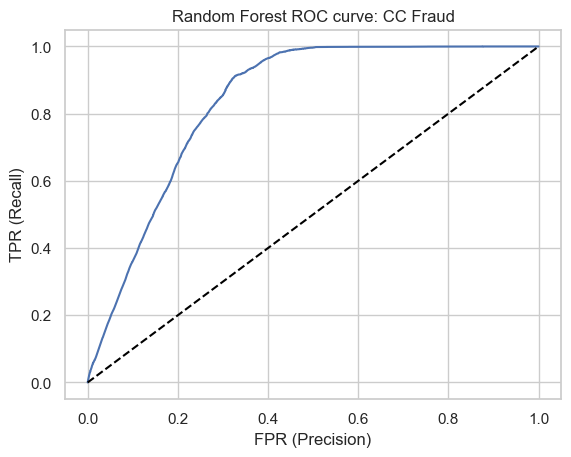

Area under curve (AUC):  0.8372218613201513


In [128]:
y_score = model.predict_proba(x_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)

title('Random Forest ROC curve: CC Fraud')
xlabel('FPR (Precision)')
ylabel('TPR (Recall)')

plot(fpr,tpr)
plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))

In [129]:
roc_auc_score(y_test, y_score)

0.8372218613201513

# XGBoost Classifier 

In [137]:
for column in cat_feat:
    x_train[column] = x_train[column].astype("float").astype('int')
    x_test[column] = x_test[column].astype('float').astype('int')

In [138]:
x_train.dtypes

Gender                      int32
Age                       float64
Driving_License             int32
Region_Code                 int32
Previously_Insured          int32
Annual_Premium            float64
Policy_Sales_Channel        int32
Vintage                   float64
Vehicle_Age_lt_1_Year       int32
Vehicle_Age_gt_2_Years      int32
Vehicle_Damage_Yes          int32
dtype: object

In [139]:
space={ 'max_depth': hp.quniform("max_depth", 3,18,1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 300,
        'seed': 0
      }

In [148]:
def objective(space):
    clf = xgb.XGBClassifier(
                    n_estimators = space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight = int(space['min_child_weight']),
                    colsample_bytree = int(space['colsample_bytree']), eval_metric="auc", early_stopping_rounds = 10)
    
    evaluation = [( x_train, y_train), ( x_test, y_test)]
    
    clf.fit(x_train, y_train,
            eval_set = evaluation,
            verbose = False)
    

    pred = clf.predict(x_test)
    y_score = model.predict_proba(x_test)[:,1]
    accuracy = accuracy_score(y_test, pred>0.5)
    Roc_Auc_Score = roc_auc_score(y_test, y_score)
    print ("ROC-AUC Score:",Roc_Auc_Score)
    print ("SCORE:", accuracy)
    return {'loss': -Roc_Auc_Score, 'status': STATUS_OK }


In [149]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

In [150]:
trials = Trials()

In [151]:

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

ROC-AUC Score:                                         
0.8372218613201513                                     
SCORE:                                                 
0.8774323558429018                                     
ROC-AUC Score:                                                                    
0.8372218613201513                                                                
SCORE:                                                                            
0.877453347047587                                                                 
ROC-AUC Score:                                                                    
0.8372218613201513                                                                
SCORE:                                                                            
0.8774323558429018                                                                
ROC-AUC Score:                                                                    
0.8372218613201513           

In [152]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

The best hyperparameters are :  

{'colsample_bytree': 0.7683078846977877, 'gamma': 4.326352028539391, 'max_depth': 16.0, 'min_child_weight': 8.0, 'reg_alpha': 169.0, 'reg_lambda': 0.7461987485528973}


In [154]:
xgb_model = xgb.XGBClassifier(n_estimators = space['n_estimators'], max_depth = 16, gamma = 4.326352028539391, reg_lambda = 0.7461987485528973,
                            reg_alpha = 169.0, min_child_weight = 8.0,colsample_bytree = 0.7683078846977877 )
    

In [155]:
xgb_model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7683078846977877, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=4.326352028539391, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=16,
              max_leaves=None, min_child_weight=8.0, missing=nan,
              monotone_constraints=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

In [67]:
filename = 'xgboost_model.sav'
pickle.dump(xgb_model, open(filename, 'wb'))

## ROC Curve & AUC of XG boost classifier

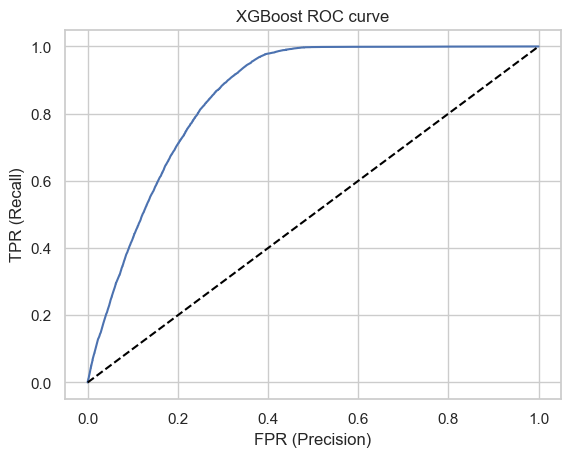

Area under curve (AUC):  0.8545317931046652


In [156]:
y_score = xgb_model.predict_proba(x_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)

title('XGBoost ROC curve')
xlabel('FPR (Precision)')
ylabel('TPR (Recall)')

plot(fpr,tpr)
plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))

In [157]:
random_state = 42
n_iter = 50
num_folds = 2
kf = KFold(n_splits = num_folds, random_state = random_state,shuffle = True)

In [163]:
def gb_mse_cv(params, random_state = random_state, cv = kf, X = x_train, y = y_train):
    # the function gets a set of variable parameters in "param"
    params = {'n_estimators': int(params['n_estimators']), 
              'max_depth': int(params['max_depth']), 
              'learning_rate': params['learning_rate'],
              'gamma': params['gamma'],
              'reg_alpha' : params['reg_alpha'],
              'reg_lambda' : params['reg_lambda'],
              'colsample_bytree' : params['colsample_bytree'],
              'min_child_weight' : params['min_child_weight']
             }
            
            
    
    # we use this params to create a new LGBM Regressor
    model = lgb.LGBMClassifier(random_state = 42, **params)
    
    # and then conduct the cross validation with the same folds as before
    score = -cross_val_score(model, X, y, cv = cv, scoring = "roc_auc", n_jobs = -1).mean()

    return score

In [165]:
#%%time

# possible values of parameters
space = {'n_estimators': hp.quniform('n_estimators', 100, 200, 1),
       'max_depth' : hp.quniform('max_depth', 2, 8, 1),
       'learning_rate': hp.loguniform("learning_rate",-4,-1),
        'gamma': hp.quniform('gamma',0.1,0.5,0.1),
        'reg_alpha' : hp.quniform('reg_alpha',1.1,1.5,0.1),
        'reg_lambda' : hp.uniform('reg_lambda',1.1,1.5),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.1,0.5),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
      }


In [166]:
# trials will contain logging information
trials = Trials()


In [168]:
best= fmin(fn = gb_mse_cv, # function to optimize
          space = space, 
          algo = tpe.suggest, # optimization algorithm, hyperotp will select its parameters automatically
          max_evals = n_iter, # maximum number of iterations
          trials = trials # logging
          #rstate = 42 # fixing random state for the reproducibility
         )



# best_hyperparams = fmin(fn = objective,
#                         space = space,
#                         algo = tpe.suggest,
#                         max_evals = 100,
#                         trials = trials)

  0%|          | 0/50 [00:00<?, ?trial/s, best loss=?]

100%|██████████| 50/50 [02:20<00:00,  2.82s/trial, best loss: -0.8576134128391993]


In [169]:
# computing the score on the test set
model = lgb.LGBMClassifier(random_state = random_state, n_estimators = int(best['n_estimators']),
                           max_depth = int(best['max_depth']),learning_rate = best['learning_rate'],gamma = best['gamma'],
                           reg_alpha = best['reg_alpha'],reg_lambda = best['reg_lambda'],colsample_bytree = best['colsample_bytree'],
                           min_child_weight = best['min_child_weight'])
model.fit(x_train,y_train)

[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 35035, number of negative: 250796
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001942 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 769
[LightGBM] [Info] Number of data points in the train set: 285831, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.122572 -> initscore=-1.968292
[LightGBM] [Info] Start training from score -1.968292
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] 

LGBMClassifier(colsample_bytree=0.489180402545234, gamma=0.5,
               learning_rate=0.05698811647279101, max_depth=7,
               min_child_weight=0.0, n_estimators=147, random_state=42,
               reg_alpha=1.1, reg_lambda=1.2461495915574141)

In [170]:
preds = [pred[1] for pred in model.predict_proba(x_test)]
score = roc_auc_score(y_test, preds, average = 'weighted')

[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [171]:
best

{'colsample_bytree': 0.489180402545234,
 'gamma': 0.5,
 'learning_rate': 0.05698811647279101,
 'max_depth': 7.0,
 'min_child_weight': 0.0,
 'n_estimators': 147.0,
 'reg_alpha': 1.1,
 'reg_lambda': 1.2461495915574141}

In [172]:
print("auc-roc score on Test data",score)

auc-roc score on Test data 0.858772620707314


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


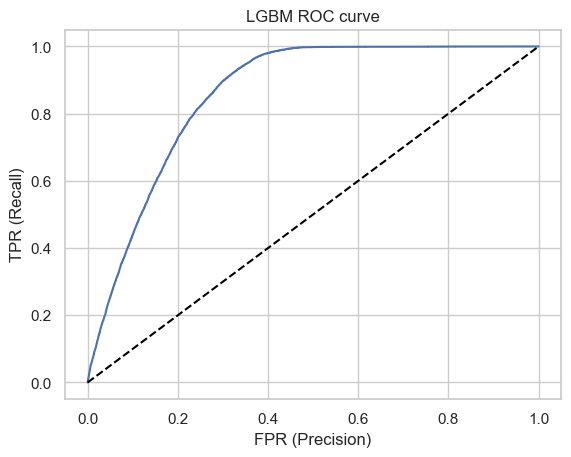

Area under curve (AUC):  0.858772620707314


In [173]:
y_score = model.predict_proba(x_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)

title('LGBM ROC curve')
xlabel('FPR (Precision)')
ylabel('TPR (Recall)')

plot(fpr,tpr)
plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))

# CatBoost 

In [174]:
#X_cat_train, X_cat_test, y_cat_train, y_cat_test = train_test_split(X_cat, Y_cat, test_size = 0.22, random_state = 22, stratify = Y_cat, shuffle = True)

cat_model = CatBoostClassifier()
cat_model = cat_model.fit(x_train, y_train, cat_features = cat_feat, eval_set = (x_test, y_test), early_stopping_rounds = 10, verbose = 100)

predictions = [pred[1] for pred in cat_model.predict_proba(x_test)]
print('Validation ROC AUC Score:', roc_auc_score(y_test, predictions, average = 'weighted'))

Learning rate set to 0.128106
0:	learn: 0.5320867	test: 0.5323419	best: 0.5323419 (0)	total: 411ms	remaining: 6m 50s
100:	learn: 0.2631533	test: 0.2640080	best: 0.2640080 (100)	total: 22.9s	remaining: 3m 23s
Stopped by overfitting detector  (10 iterations wait)

bestTest = 0.2639447863
bestIteration = 119

Shrink model to first 120 iterations.
Validation ROC AUC Score: 0.858972821508485


# Evaluating on Test data

## Catboost

In [175]:
test

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Vehicle_Age_lt_1_Year,Vehicle_Age_gt_2_Years,Vehicle_Damage_Yes
0,1,-0.890089,1,11.0,1,0.070633,152.0,-1.211054,1,0,0
1,1,0.079795,1,28.0,0,0.066321,7.0,-0.517782,0,0,1
2,1,0.532408,1,28.0,0,0.079717,124.0,0.534079,0,0,1
3,1,-0.954748,1,27.0,1,0.073978,152.0,0.390643,1,0,1
4,1,-0.760771,1,28.0,1,0.120293,152.0,1.705469,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
127032,0,-0.825430,1,37.0,1,0.060154,152.0,-1.175195,1,0,0
127033,0,-0.049523,1,28.0,0,0.055538,122.0,0.127678,0,0,1
127034,1,-1.148725,1,46.0,1,0.057885,152.0,-0.960042,1,0,0
127035,1,2.084224,1,28.0,1,0.128341,26.0,1.322974,0,0,0


In [176]:
Preds = [pred[1] for pred in cat_model.predict_proba(test)]

In [177]:
# submission = pd.DataFrame(data = {'id': id, 'Response': Preds})
# submission.to_csv('vehicle_insurance_catboost.csv', index = False)
# submission.head()

## LGBM 

In [187]:
test_df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Vehicle_Age_lt_1_Year,Vehicle_Age_gt_2_Years,Vehicle_Damage_Yes
0,381110,1,-0.890089,1,11.0,1,0.070633,152.0,-1.211054,1,0,0
1,381111,1,0.079795,1,28.0,0,0.066321,7.0,-0.517782,0,0,1
2,381112,1,0.532408,1,28.0,0,0.079717,124.0,0.534079,0,0,1
3,381113,1,-0.954748,1,27.0,1,0.073978,152.0,0.390643,1,0,1
4,381114,1,-0.760771,1,28.0,1,0.120293,152.0,1.705469,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
127032,508142,0,-0.825430,1,37.0,1,0.060154,152.0,-1.175195,1,0,0
127033,508143,0,-0.049523,1,28.0,0,0.055538,122.0,0.127678,0,0,1
127034,508144,1,-1.148725,1,46.0,1,0.057885,152.0,-0.960042,1,0,0
127035,508145,1,2.084224,1,28.0,1,0.128341,26.0,1.322974,0,0,0


In [182]:
id=test_df.id
#test.drop(['id'],axis=1,inplace=True)

In [185]:
test_df["Gender"].isna().sum()

0

In [188]:
# test_df['Gender'] = test_df['Gender'].map( {'Female': 0, 'Male': 1} ).astype(int)
# test_df = pd.get_dummies(test_df, drop_first = True)
# test_df = test_df.rename(columns = {"Vehicle_Age_< 1 Year": "Vehicle_Age_lt_1_Year", "Vehicle_Age_> 2 Years": "Vehicle_Age_gt_2_Years"})
# test_df = test_df.rename(columns = {"Vehicle_Age_< 1 Year": "Vehicle_Age_lt_1_Year", "Vehicle_Age_> 2 Years": "Vehicle_Age_gt_2_Years"})

In [189]:
# Preds = [pred[1] for pred in model.predict_proba(test)]